In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

In [2]:
df=sns.load_dataset("titanic")

In [3]:
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: >

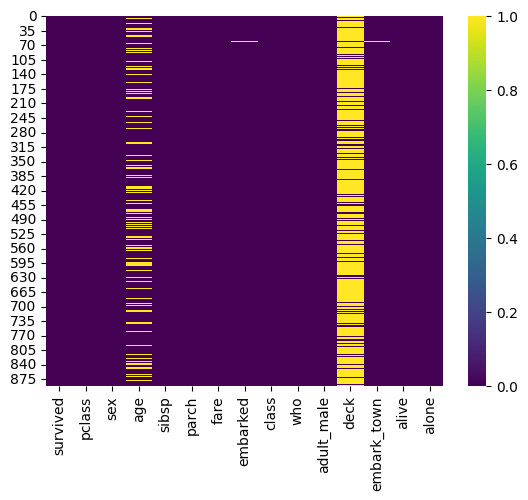

In [4]:
sns.heatmap(df.isnull(),cmap='viridis')

In [5]:
df['age'].isnull().sum()/df.shape[0]
#this shows what percentage of age column is null

0.19865319865319866

<Axes: >

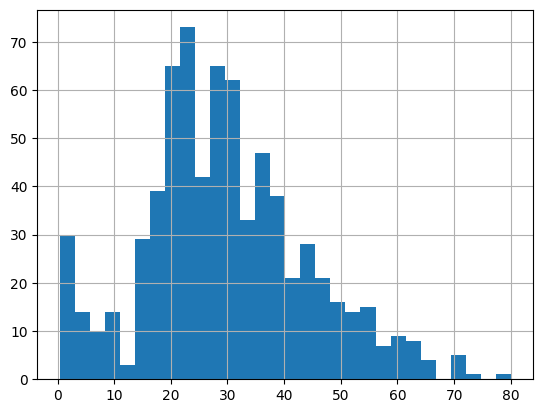

In [6]:
df['age'].hist(bins=30)

In [7]:
def impute_age(pclass,sex):
    if sex=='male':
        if pclass==1:
            return df[(df['pclass']==1)&(df['sex']=='male')]['age'].mean()
        elif pclass==2:
            return df[(df['pclass']==2)&(df['sex']=='male')]['age'].mean()
        else:
            return df[(df['pclass']==3)&(df['sex']=='male')]['age'].mean()
    else:
        if pclass ==1:
            return df[(df['pclass']==1)&(df['sex']!='male')]['age'].mean()
        elif pclass==2:
            return df[(df['pclass']==2)&(df['sex']!='male')]['age'].mean()
        else:
            return df[(df['pclass']==3)&(df['sex']!='male')]['age'].mean()

In [8]:
if df['age'].isnull().any():
    df['age'] = df.apply(lambda x: impute_age(x['pclass'], x['sex']) if pd.isnull(x['age']) else x['age'], axis=1)
    
# lambda x takes one argument in kindoff a for loop untill the inputs end and returns the value in the df
# apply() applies the code to each row in the df

In [9]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.00,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.00,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.00,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.00,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.00,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.00,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,21.75,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.00,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [11]:
# convert any column into any data type you want
df['age']=df['age'].astype('int')
df['fare']=df['fare'].astype('int')
gender={'male':0,'female':1}
df['sex']=df['sex'].map(gender)
df['who']=df['who'].map(gender)
live={'yes':0,'no':1}
df['alive']=df['alive'].map(live)
dec={' ':0,'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7}
df['deck']=df['deck'].map(dec)
clss={'First':1,'Second':2,'Third':3}
df['class']=df['class'].map(clss)
df['class']=df['class'].astype('float')
df['deck']=df['deck'].astype('float')

In [12]:
df.info()
df['embark_town'].mean


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    int64  
 3   age          891 non-null    int64  
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    int64  
 7   embarked     889 non-null    object 
 8   class        891 non-null    float64
 9   who          0 non-null      float64
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    float64
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    int64  
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(3), int64(8), object(2)
memory usage: 92.4+ KB


<bound method Series.mean of 0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object>

In [13]:
input_col=list(df[1:])
input_col.remove('embark_town')
target_col='survived'
x=df[input_col]
y=df[target_col]

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x.shape,x_train.shape,x_test.shape,y_train.shape

((891, 14), (712, 14), (179, 14), (712,))

In [16]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)

ValueError: could not convert string to float: 'S'